# MFKZIZ004 : Atmospheric modelling
## Task 1

In this section the main aim is plot the changes in temperature with changes to the albedo and emissivity variables. Then that will be plotted to show the changes. 

#### Energy Balance Model (EBM1):

$S(1 - \alpha) = 4 \varepsilon \sigma T^4$

### The model rearranged:



$T = \left( \frac{S(1 - \alpha)}{4 \varepsilon \sigma} \right)^{\tfrac{1}{4}}$


#### Checking if the model works:

In [21]:
# S(1- alpha) = 4*epsilon*T^-4
# Below are the values that we need to make sure that the model works, they will be put into the model. 
S = 1372
alpha = 0.3
epsilon = 0.6
sigma = 5.67*10**-8

T_cubed = S*(1-alpha)/(4*epsilon*sigma)
T = T_cubed**(1/4)
print(T) # Kelvin
print(T-273.15) #Celsius

289.84409886355775
16.69409886355777


#### (a) Plotting Sensitivity to Albedo and Emissivity

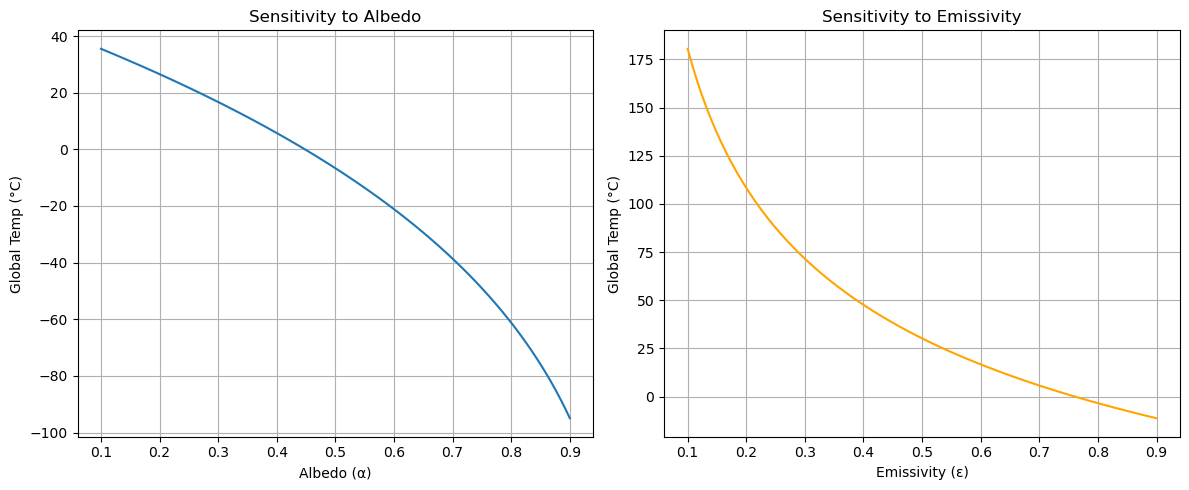

In [24]:
import numpy as np
import matplotlib.pyplot as plt

S = 1372
sigma = 5.67e-8

# This is a function used to compute temperature from alpha and epsilon
def compute_T(alpha, epsilon):
    T4 = S * (1 - alpha) / (4 * epsilon * sigma)
    return T4**(1/4)

# Part 1: Sensitivity to albedo
alphas = np.linspace(0.1, 0.9, 100) # These are the values we want to create our range from 
temps_alpha = compute_T(alphas, epsilon=0.6)

# 2. Sensitivity to emissivity
epsilons = np.linspace(0.1, 0.9, 100)
temps_epsilon = compute_T(alpha=0.3, epsilon=epsilons)

# Plotting the two different graphs 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, temps_alpha - 273.15)
plt.xlabel('Albedo (α)')
plt.ylabel('Global Temp (°C)')
plt.title('Sensitivity to Albedo')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epsilons, temps_epsilon - 273.15, color='orange')
plt.xlabel('Emissivity (ε)')
plt.ylabel('Global Temp (°C)')
plt.title('Sensitivity to Emissivity')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Comment on the two graphs:

The graphs have shown that when the albedo effect is increased that leads to a increase in temperature. This may be due to the heat that will be reflected back. Additionally, it has been revealed that an increase in the emissivity leads to a decrease in temperature.


#### (b) Finding the % change to cool Earth to 0°C and the above plots will be used 


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = 1372  # Solar constant
sigma = 5.67e-8  # Stefan-Boltzmann constant
alpha_ref = 0.3
epsilon_ref = 0.6

# Temperature function
def compute_T(alpha, epsilon):
    T4 = S * (1 - alpha) / (4 * epsilon * sigma)
    return T4**(1/4)

# Albedo range (holding ε constant)
alphas = np.linspace(0.1, 0.9, 500)
temps_alpha = compute_T(alphas, epsilon=epsilon_ref) - 273.15  # in °C

# Emissivity range (holding α constant)
epsilons = np.linspace(0.1, 0.9, 500)
temps_epsilon = compute_T(alpha=alpha_ref, epsilon=epsilons) - 273.15  # in °C

# Find alpha where temperature ≈ 0°C
idx_alpha = np.argmin(np.abs(temps_alpha - 0))
alpha_needed = alphas[idx_alpha]
alpha_change_pct = ((alpha_needed - alpha_ref) / alpha_ref) * 100

# Find epsilon where temperature ≈ 0°C
idx_epsilon = np.argmin(np.abs(temps_epsilon - 0))
epsilon_needed = epsilons[idx_epsilon]
epsilon_change_pct = ((epsilon_needed - epsilon_ref) / epsilon_ref) * 100

# Print results
print("TASK 1(b) RESULTS")
print(f"Required albedo for 0°C: {alpha_needed:.3f}")
print(f"→ Percentage change in albedo: {alpha_change_pct:.2f}%")
print(f"Required emissivity for 0°C: {epsilon_needed:.3f}")
print(f"→ Percentage change in emissivity: {epsilon_change_pct:.2f}%")


TASK 1(b) RESULTS
Required albedo for 0°C: 0.448
→ Percentage change in albedo: 49.30%
Required emissivity for 0°C: 0.761
→ Percentage change in emissivity: 26.75%


#### (c) Getting the 3°C warming as well as the offsetting

In [32]:
# Reference temperature
T_ref = compute_T(alpha=alpha_ref, epsilon=epsilon_ref)  # in K
T_target = T_ref + 3  # Increase by 3°C → 3 K

# Rearranged to find required ε for T_target
epsilon_new = S * (1 - alpha_ref) / (4 * sigma * T_target**4)
epsilon_pct_change = ((epsilon_new - epsilon_ref) / epsilon_ref) * 100

# Now: what alpha would cancel that warming (bring T back to T_ref)?
# Solve for alpha needed with same new ε but T = T_ref again
alpha_offset = 1 - (4 * epsilon_new * sigma * T_ref**4) / S
alpha_pct_change = ((alpha_offset - alpha_ref) / alpha_ref) * 100

# Print results
print("\nTASK 1(c) RESULTS")
print(f"Required ε to increase T by 3°C: {epsilon_new:.3f}")
print(f"→ Percentage change in ε: {epsilon_pct_change:.2f}%")
print(f"Required α to cancel warming: {alpha_offset:.3f}")
print(f"→ Percentage change in α: {alpha_pct_change:.2f}%")



TASK 1(c) RESULTS
Required ε to increase T by 3°C: 0.576
→ Percentage change in ε: -4.04%
Required α to cancel warming: 0.328
→ Percentage change in α: 9.42%


#### (d) What are the limitations of the Energy Balance Model for climate change studies


- The model is so simple that it treats earth as a single point, and this make it ignore the latitudinal and seasonal temperature variations.
- Things such as cloud formation (droplets) and various greenhouse gases are not included. 
- Albedo and emissivity constanta are treated as if they are constant, but they change with temperature, ice cover, etc.
-  It only shows the heat storage and transport processes.
- As a result, nonlinear feedbacks, such as ice-albedo feedback or water vapor effects are nor accounted for. 

Even though it has some limitations, it can be still used to understand basic climate changes. 

# Task 2



$C_p \frac{dT}{dt} = S(1 - \alpha) - 4 \epsilon \sigma T^4$

##### Where:

- $( C_p )$: Heat capacity of the climate system (W·year·m⁻²·K⁻¹)  
- $( S )$: Solar constant  
- $(alpha)$: Albedo  
- $( epsilon )$: Emissivity  
- $( sigma )$: Stefan-Boltzmann constant  
- $( T )$: Temperature (in Kelvin)


#### (a) Plotting Temperature Evolution and Compare with Equilibrium Temperature

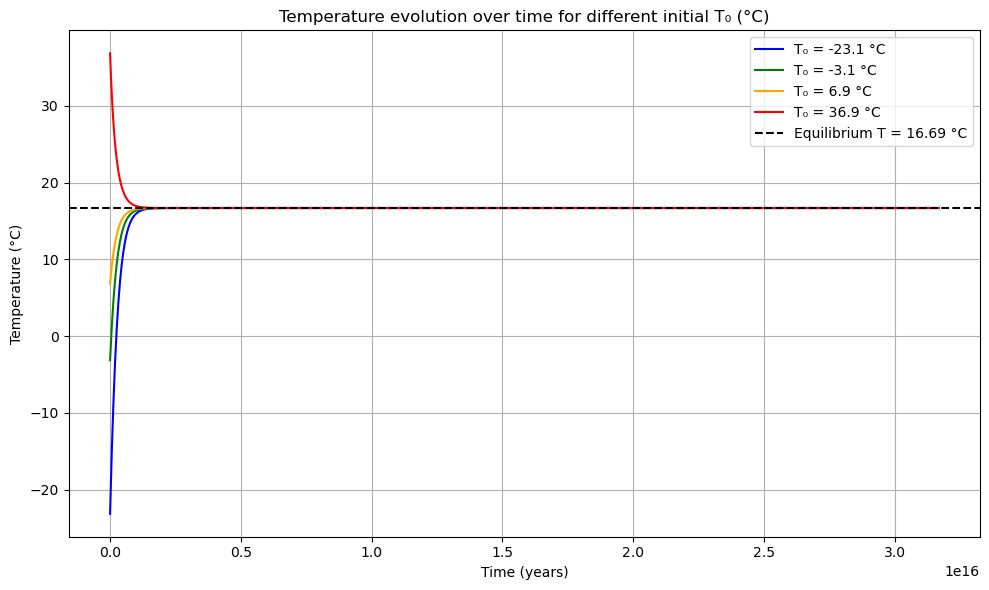

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Cp = 1.05e23  # J/K
S = 1372      # W/m^2
alpha = 0.3
sigma = 5.67e-8  # W/m^2/K^4
epsilon = 0.6
dt = 1.0e21   # seconds
Nstep = 1000  # Number of time steps

# Define time array in years
seconds_per_year = 3.154e7
time = np.arange(0, Nstep * dt, dt) / seconds_per_year

# dT/dt function 
def dT_dt(T):
    incoming = S * (1 - alpha)
    outgoing = 4 * epsilon * sigma * T**4
    return (incoming - outgoing) / Cp

# Euler solver 
def solve_temperature(T0):
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt(T[i-1]) * dt
    return T

# Initial temperatures (K), converted to Celsius for labeling
T0_values = [250, 270, 280, 310]  # Kelvin
solutions = [solve_temperature(T0) for T0 in T0_values]

# Equilibrium temperature in Kelvin and Celsius
T_eq = (S * (1 - alpha) / (4 * epsilon * sigma))**(1/4)
T_eq_C = T_eq - 273.15

# Plotting in Celsius
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']
for T0, T_sol, color in zip(T0_values, solutions, colors):
    T_sol_C = T_sol - 273.15  # Convert to Celsius
    plt.plot(time, T_sol_C, label=f"T₀ = {T0 - 273.15:.1f} °C", color=color)

plt.axhline(T_eq_C, color='black', linestyle='--', label=f'Equilibrium T = {T_eq_C:.2f} °C')
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature evolution over time for different initial T₀ (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### (b) Checking the effect of Changing Cp on Time to Equilibrium

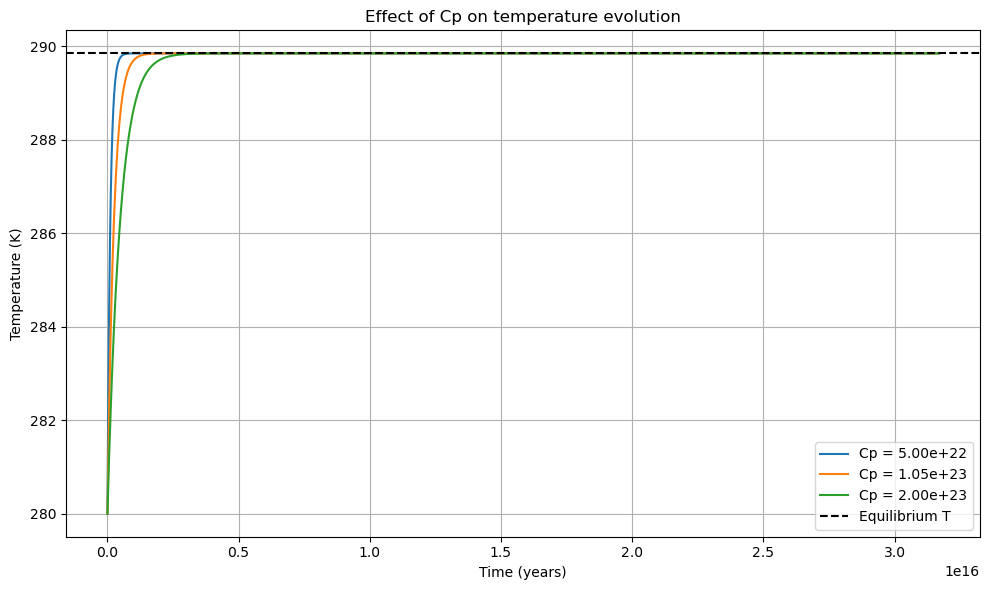

In [41]:
# Different Cp values
Cp_values = [0.5e23, 1.05e23, 2.0e23]
T0 = 280  # fixed starting temperature

def solve_temperature_Cp(T0, Cp):
    def dT_dt_Cp(T):
        incoming = S * (1 - alpha)
        outgoing = 4 * epsilon * sigma * T**4
        return (incoming - outgoing) / Cp
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt_Cp(T[i-1]) * dt
    return T

# Solve for each Cp
solutions_Cp = [solve_temperature_Cp(T0, Cp) for Cp in Cp_values]

# Plot
plt.figure(figsize=(10, 6))
for Cp_val, sol in zip(Cp_values, solutions_Cp):
    plt.plot(time, sol, label=f"Cp = {Cp_val:.2e}")
plt.axhline(T_eq, color='black', linestyle='--', label='Equilibrium T')
plt.xlabel("Time (years)")
plt.ylabel("Temperature (K)")
plt.title("Effect of Cp on temperature evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Answer on how  changes in Cp affect the equilibrium time of the model? Do they influence the equilibrium temperature, both in terms of time and value?

Changes in Cp affects how fast the model reaches equilibrium without affcet thie final equilibrium a temprature has. When the Cp is high it means that the model will take a very long time to adjust to the energy imbalances so this means that they will reach equilibrium slower. On the other side, when then Cp is low, it means that the model will be able to respond very quickly, as a result reaching equilibrium is quicker. What we can also see in the above graph is that despite the differing Cp vakues, they all meet at the same equilibrium temperature.

#### (c) Adding Ice-Albedo Feedback and Compare

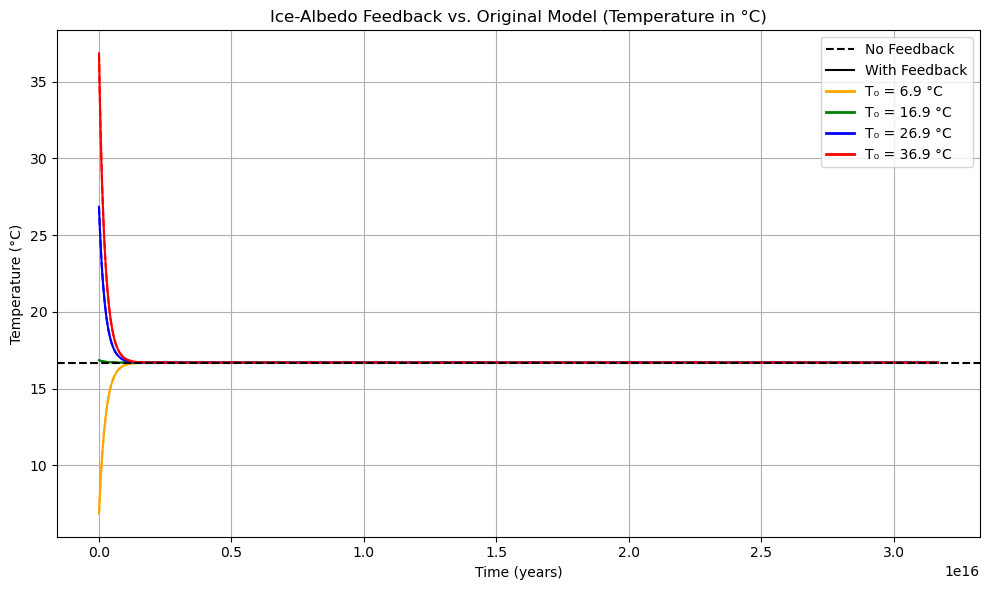

In [64]:
# Ice-albedo feedback model
def dT_dt_ice_feedback(T):
    alpha_dynamic = 0.62 if T < 273.15 else 0.3
    incoming = S * (1 - alpha_dynamic)
    outgoing = 4 * epsilon * sigma * T**4
    return (incoming - outgoing) / Cp

# Solver with feedback
def solve_temperature_feedback(T0):
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt_ice_feedback(T[i-1]) * dt
    return T

# Updated initial temperatures (Kelvin)
T0_values = [280, 290, 300, 310]
colors = ['orange', 'green', 'blue', 'red']
exclude = [250, 270]

# Solve
solutions = [solve_temperature_feedback(T0) for T0 in T0_values]
solutions_feedback = [solve_temperature_feedback(T0) for T0 in T0_values]

# Calculate equilibrium temperature
T_eq = (S * (1 - alpha) / (4 * epsilon * sigma))**(1/4)
T_eq_C = T_eq - 273.15  # Convert to Celsius

# Plot with temperatures in Celsius
plt.figure(figsize=(10, 6))
for T0, T_orig, T_feed, color in zip(T0_values, solutions, solutions_feedback, colors):
    if any(np.isclose(T0, ex) for ex in exclude):
        continue
    plt.plot(time, T_orig - 273.15, linestyle='--', color=color)   # No feedback: dashed, in °C
    plt.plot(time, T_feed - 273.15, linestyle='-', color=color)    # With feedback: solid, in °C

plt.axhline(T_eq_C, color='black', linestyle='--', label='T_eq')

# Custom Legend
legend_lines = [
    plt.Line2D([0], [0], color='k', linestyle='--', label='No Feedback'),
    plt.Line2D([0], [0], color='k', linestyle='-', label='With Feedback')
]

# Add colored T₀ labels in Celsius
for T0, color in zip(T0_values, colors):
    if any(np.isclose(T0, ex) for ex in exclude):
        continue
    legend_lines.append(plt.Line2D([0], [0], color=color, linewidth=2, label=f'T₀ = {T0 - 273.15:.1f} °C'))

plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
plt.title("Ice-Albedo Feedback vs. Original Model (Temperature in °C)")
plt.legend(handles=legend_lines, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### Answer after I compared the equilibrium values obtained now with those in (a).  

Making the albedo 0,62 for temperature dropped below 0 °C has enhanced the reflection ability and this increases radiation while increaisng cooling. This made the not converge towards an equilibrium of 16.69 °C that we got in question (a). Here it seeems that initial temperatures that were high took longer to reach equilibrium. In constrast to lower temperatures that reached equilibrium quicker. This has shown how in intruduction of albedo has introduced unstability in the system. 



#### (d) Climate Change and Tipping Points
Adding Ice has made the model non linear. It has been seen that temperature drecreases with increasing albedo below the freezing point. We saw that cooling leads to creation of ice and this increases albebo and temperature is decreased. This is what pushes the system outside of its range and this is what is called the tipping point. If we were to take this concept into the real world and apply it to global warming, it may cause abrupt climate changes. This would because the ice wouuld be reduced because it will melt, and this will cause temperatures to be higher. That is why it is curcial to understand these dynamics so that one can be able to predict climate shifts especially in polar areas. 

### (e) limitations:
This model only has global mean temperature. It treats earth as a single point and there are same temperature and albedo conditions. This model assumes that there is equilibrium that is reached, in the real world that is not the case there maybe some drastic environmental changes. 

# Task 3

### (a)	Test the sensitivity of the model to heat transport coefficient (k). 

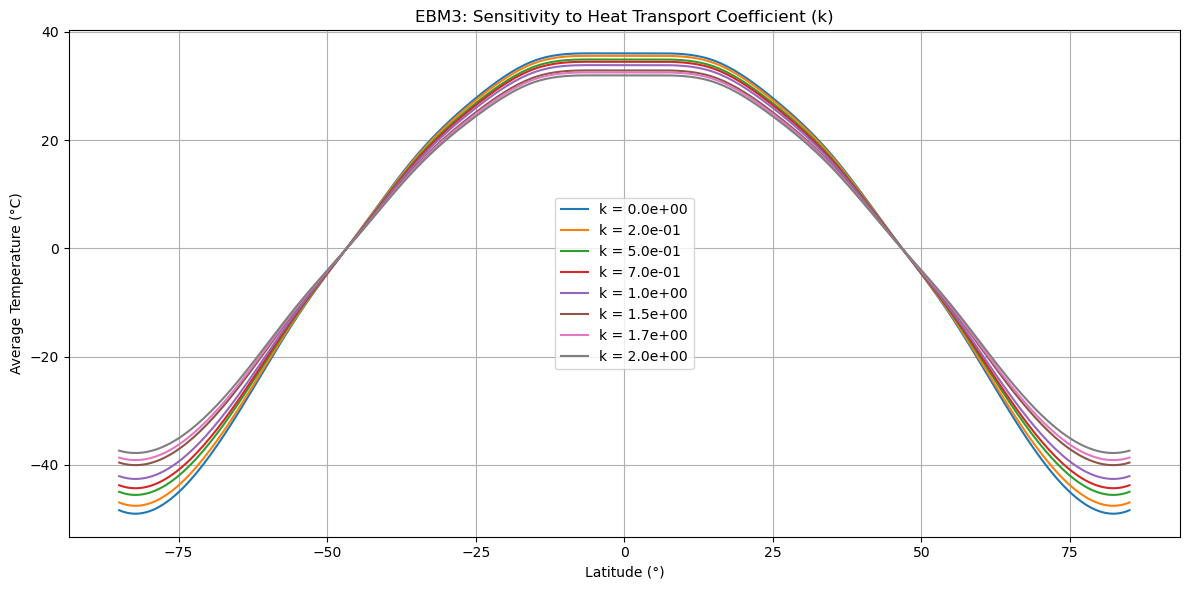

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

#  Constants from the Task 
S = 1372  # Solar constant (W/m^2)
Cp = 1.05e23  # Heat capacity (J/K)
dt = 1.0e21  # Time step (s)
Nstep = 1000  # Number of time steps
epsilon = 0.6  # Emissivity
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
seconds_per_year = 3.154e7
time = np.arange(Nstep) * dt / seconds_per_year  # Convert time to years

#  Zone and Latitude Data 
latitudes = np.array([
    85, 75, 65, 55, 45, 35, 25, 15, 5,
    -5, -15, -25, -35, -45, -55, -65, -75, -85
])
zones = [
    (85, 0.500, 0.500), (75, 0.531, 0.500), (65, 0.624, 0.452),
    (55, 0.770, 0.407), (45, 0.892, 0.357), (35, 1.021, 0.309),
    (25, 1.120, 0.272), (15, 1.189, 0.248), (5, 1.219, 0.254),
    (-5, 1.219, 0.254), (-15, 1.189, 0.248), (-25, 1.120, 0.272),
    (-35, 1.021, 0.309), (-45, 0.892, 0.357), (-55, 0.770, 0.407),
    (-65, 0.624, 0.452), (-75, 0.531, 0.500), (-85, 0.500, 0.500)
]
Sfrac = np.array([z[1] for z in zones])
albedo = np.array([z[2] for z in zones])
T_init = np.zeros(len(zones)) + 273.15  # Initial temperature in Kelvin

# EBM3 Solver
def solve_EBM3(k):
    Tlat = np.zeros((Nstep, len(T_init)))
    Tlat[0] = T_init.copy()

    for t in range(1, Nstep):
        Tglobal = np.mean(Tlat[t-1])
        absorbed = S * Sfrac * (1 - albedo)
        emitted = 4 * epsilon * sigma * Tlat[t-1]**4
        transport = k * (Tlat[t-1] - Tglobal)
        dTdt = (absorbed - emitted - transport) / Cp
        Tlat[t] = Tlat[t-1] + dTdt * dt

        # Clamp temperatures to avoid numerical issues
        Tlat[t] = np.clip(Tlat[t], 150, 350)

    return Tlat

# Sensitivity Analysis for different values of k 
k_values = [0, 0.2, 0.5, 0.7, 1,1.5, 1.7, 2.0]
results = {}

plt.figure(figsize=(12, 6))
for k in k_values:
    T_model = solve_EBM3(k)
    T_avg = np.mean(T_model, axis=0) - 273.15  # Convert to Celsius
    results[k] = T_avg

    # Spline smoothing
    lat_sorted, T_sorted = zip(*sorted(zip(latitudes, T_avg)))
    lat_new = np.linspace(min(lat_sorted), max(lat_sorted), 300)
    spl = make_interp_spline(lat_sorted, T_sorted, k=3)
    T_smooth = spl(lat_new)

    plt.plot(lat_new, T_smooth, label=f'k = {k:.1e}')

plt.xlabel("Latitude (°)")
plt.ylabel("Average Temperature (°C)")
plt.title("EBM3: Sensitivity to Heat Transport Coefficient (k)")
plt.grid(True)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5)) 
plt.tight_layout()
plt.show()


#### Comment on the graph: The sensitivity to Heat Transport Coefficient:
- As k increases, the temperature distribution becomes more uniform across latitudes. Lower values of k show greater temperature contrast between equator and poles.It seems that increase in K leads to temperature increase.


### (b) Components of the Earth System Represented by Heat Transport:

The heat transport term (k*(Tlat - Tglobal)) represents the large-scale atmospheric and oceanic circulations that redistribute heat from equatorial to polar regions.


### (c) Processes Involved in Heat Transport:

- Atmospheric circulation (e.g., Hadley cells, jet streams)
- Ocean currents (e.g., Gulf Stream, thermohaline circulation)


### (d) Limitations of this Model:
- This model is so simple and it only shows latitidinal changes. The vertical component is nit accounted for.
- Other things such as water vapor and raind drops are not included on the model and they may impact the temperature.
- We have albedo and emmisivity as constants but it is not always the case because in real world secanarios that always changes.
- It helps understand basic temparature changes in a simple model. 

# Task 4

### (a)  Discuss the role of atmospheric motions in the Earth climate system:

Atmospheric motion are very important as they are responsible distributing heat across the globe, water contents and momentum and thus they drive the energy balace on earth. There are large atmoshperic cells which include in the Hadley, Ferrel and Polar cells that reduce the temperature gradient between the polar and the equator regions. These cells will take the warm moist air from the equator towards the poles and the cold dry air from the poles towards the equator. Since the ocean and the atmosphere have a rekationship, whatever happens in the air affects the ocean. Therefore, the movement of the latter atmospheric cells affects the ocean by influencig the ocean currents and precipitation patterns. Furthermore, the atmopsheric motions help with the movement of aerosols and greenhouse gases and this will change the waether patterns both locally and globally. If air movemnents were not present it would mean that locally or regionally there would be very extreme weather conditions and there planet would not have temperature gradients.  


### (b) Advection, Diffusion and Convection are three important processes in atmospheric motions. In your own words discuss the similarities and differences between these processes

The three processes are part of the processes that have been mentioned in the previous question. They are involved in the transportation of heat and matter in the air. The first process is advection, this refers to the horizontal or vertical movement of a particular substance (e.g pollutant/aerosol) driven by wind. Its important to note that the speed of the wind and direction drive how fast the substance moves in the air from point A to point B. Diffusion, on the other hand, refers to the spread of a substance from an area of high concentration to an area of low concentration. This process is driven by the concentration gradient, is the concentration gradient is too high the spread will be quicker compared to when its less. The last process which is convection refers to vertical transport of a substnace and this is governed by thermal gradients and bouyancy. An example would be the rising of warm air and this creates condenstation that forms clouds and rainfall. 

### (c) Coastal Fumigation and Atmospheric Conditions

According to Seinfeld and Pandis (2016) coastal fumigation is when a particular substance or pollutant that was trapped under stable marine boundary gets brought onto the surface over a coastal region. This will lead to higher concentrations on the ground because duringbthe process the movement of the cool ocean air goes under the warm air from the continent. The conductive air conditions that enable this include temperature inversion, onshore winds and strong radiation. During the temperature inversion the warm air layer is the one that traps a pollutant above the cold air. However, when the inversion breaks the pollutant will be able to reach the surface level. The onshore winds will cause mixing as the marine layer will be brought inland. Lastly, the strong heat will enhance the pressure gradient and this increasing the onshore flow. 

### (d) 3-D Dispersion Model in Python
I  have seperated the advection and diffsion and combined them to form the 3D model.

### The advection part 

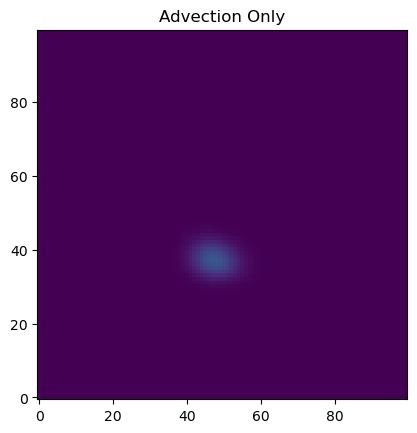

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid parameters
nx, ny = 100, 100
dx = dy = 1.0
dt = 0.2
nt = 100  # number of time steps

# Wind components
u = 1.0  # m/s in x-direction
v = 0.5  # m/s in y-direction

# Initial concentration
c = np.zeros((ny, nx))
c[25:30, 25:30] = 10.0  # Small square source in bottom-left

# Plot setup
fig, ax = plt.subplots()
im = ax.imshow(c, origin='lower', cmap='viridis', vmin=0, vmax=10)
ax.set_title('Advection Only')

# Animation function
def update(frame):
    global c
    c_new = c.copy()

    # Upwind advection in x-direction
    c_new[:, 1:] -= u * dt / dx * (c[:, 1:] - c[:, :-1])
    # Upwind advection in y-direction
    c_new[1:, :] -= v * dt / dy * (c[1:, :] - c[:-1, :])

    c[:] = c_new
    im.set_data(c)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=True)

HTML(ani.to_jshtml())


### Diffusion part

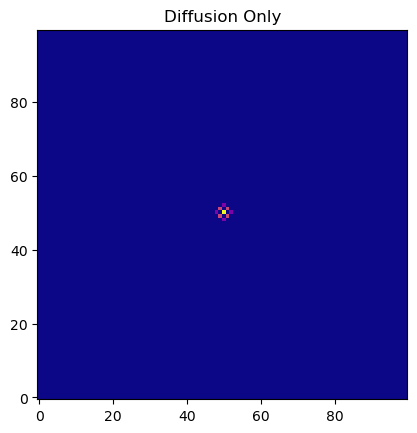

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid parameters
nx, ny = 100, 100
dx = dy = 1.0
dt = 0.1
nt = 100  # number of time steps

# Diffusion coefficient
K = 5.0  # m²/s

# Initial concentration
c = np.zeros((ny, nx))
c[50, 50] = 100.0  # Point source in the center

# Plot setup
fig, ax = plt.subplots()
im = ax.imshow(c, origin='lower', cmap='plasma', vmin=0, vmax=100)
ax.set_title('Diffusion Only')

# Animation function
def update(frame):
    global c
    c_new = c.copy()

    # Central difference diffusion
    c_new[1:-1, 1:-1] += K * dt / dx**2 * (
        c[2:, 1:-1] + c[:-2, 1:-1] + c[1:-1, 2:] + c[1:-1, :-2] - 4 * c[1:-1, 1:-1]
    )

    c[:] = c_new
    im.set_data(c)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=True)

# Show animation in notebook
HTML(ani.to_jshtml())


# This is my 3D 

### This is my 3D showing my concentration 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Grid size
nx, ny, nz = 30, 30, 15
dx, dy, dz = 1.0, 1.0, 1.0  # km
dt = 1.0  # s
nt = 50   # number of time steps

# Wind velocities (km/s)
u, v, w = 0.1, 0.05, 0.02

# Diffusion coefficients (km^2/s)
Kx, Ky, Kz = 0.01, 0.01, 0.005

# Source term (units of concentration/time)
S = 0.0

# Create concentration grid
C = np.zeros((nx, ny, nz))
# Initial plume at center near surface
C[nx//3, ny//3, 2] = 100.0

# Time-stepping function
def step(C):
    C_new = np.copy(C)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                adv_x = -u * (C[i, j, k] - C[i-1, j, k]) / dx
                adv_y = -v * (C[i, j, k] - C[i, j-1, k]) / dy
                adv_z = -w * (C[i, j, k] - C[i, j, k-1]) / dz

                diff_x = Kx * (C[i+1, j, k] - 2*C[i, j, k] + C[i-1, j, k]) / dx**2
                diff_y = Ky * (C[i, j+1, k] - 2*C[i, j, k] + C[i, j-1, k]) / dy**2
                diff_z = Kz * (C[i, j, k+1] - 2*C[i, j, k] + C[i, j, k-1]) / dz**2

                C_new[i, j, k] += dt * (adv_x + adv_y + adv_z + diff_x + diff_y + diff_z + S)
    return C_new

# Set up figure for animation (visualizing z=2 layer)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, nx)
y = np.arange(0, ny)
X, Y = np.meshgrid(x, y)
Z = C[:, :, 2]

surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Simulated Coastal Fumigation (z=2 layer)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Concentration")
ax.set_zlim(0, 100)

# Update function for animation
def update(frame):
    global C
    C = step(C)
    ax.clear()
    
    Z = C[:, :, 2]  # Slice at z = 2
    
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f"Coastal Fumigation Simulation (z=2), Frame {frame}")
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Concentration")
    ax.set_zlim(0, 100)

# Run the animation
ani = animation.FuncAnimation(fig, update, frames=nt, interval=200)
plt.show()
HTML(ani.to_jshtml())

### The 3D model: 

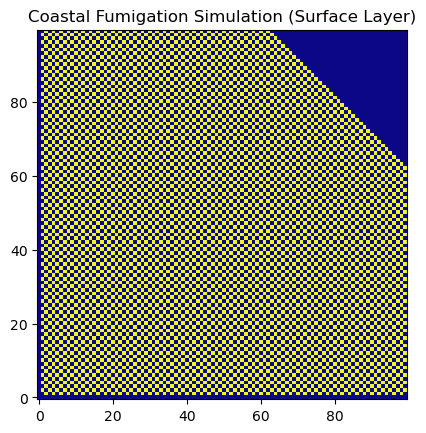

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid parameters
nx, ny, nz = 100, 100, 20
dx = dy = 1.0
dz = 1.0
dt = 0.2
nt = 100  # number of time steps

# Wind components (m/s)
u = 2.0   # X-direction wind (onshore wind)
v = 0.5   # Y-direction wind
w = 0.1   # Vertical motion (small)

# Diffusion coefficients (m²/s)
Kx, Ky, Kz = 5.0, 5.0, 1.0

# Source term - Elevated pollutant layer offshore
S = np.zeros((ny, nx, nz))
S[30:35, 30:35, 10] = 1.0  # Source at height z=10, representing inversion layer

# Initial concentration
c = np.zeros((ny, nx, nz))

# Set up figure for surface layer (near ground z = 1)
fig, ax = plt.subplots()
im = ax.imshow(c[:, :, 1], origin='lower', cmap='plasma', vmin=0, vmax=5)
ax.set_title('Coastal Fumigation Simulation (Surface Layer)')

# Animation function
def update(frame):
    global c

    c_new = c.copy()

    # Upwind Advection in X, Y, Z
    c_new[:, 1:, :] -= u * dt / dx * (c[:, 1:, :] - c[:, :-1, :])
    c_new[1:, :, :] -= v * dt / dy * (c[1:, :, :] - c[:-1, :, :])
    c_new[:, :, 1:] -= w * dt / dz * (c[:, :, 1:] - c[:, :, :-1])

    # Simple central-difference Diffusion
    c_new[1:-1, :, :] += Kx * dt / dx**2 * (c[2:, :, :] - 2*c[1:-1, :, :] + c[:-2, :, :])
    c_new[:, 1:-1, :] += Ky * dt / dy**2 * (c[:, 2:, :] - 2*c[:, 1:-1, :] + c[:, :-2, :])
    c_new[:, :, 1:-1] += Kz * dt / dz**2 * (c[:, :, 2:] - 2*c[:, :, 1:-1] + c[:, :, :-2])

    # Add Source
    c_new += S * dt

    c[:] = c_new

    # Update surface layer plot
    im.set_data(c[:, :, 1])
    return [im]

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=True)

# Show animation in notebook
HTML(ani.to_jshtml())

### Description of the above 3D model:

The model was used to simulate coastal fumigation and we had to make use of upstream advection and diffusion. It can be clearly seen that the pollutant is at an elavted hieght offshore and this shows that it was trapped above the marine boundary layer. The pollutant seems to have moved close to the coast and this was done by the onshore winds. This model was able to show that there is increase of surface concentration over time and this is usaully what happens in the real world and this affects the air quality. 